In [1]:
from mt_scores import get_scores_auto
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random as rand

2022-11-07 07:34:08.775601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 07:34:08.775620: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def mean(listvals):
    return sum(listvals)/len(listvals)

In [3]:
# This is a notebook to examine errors in the selection process of our efficient lattice with CQEUT
# We'll look at a couple of examples specifically to get our insights
def get_pickle(fname):
    f = open(fname, 'rb')
    return pickle.load(f)

# Load in necessary data for a given graph
def init_data(lang, chosen):
    gbase = "detest_reversed/"
    lpbase = "germanlatpreds"
    expldir = "germantest_exploded/"
    if lang=='fr-en':
        gbase = "frtest_reversed/"
        lpbase = "frenchlatpreds"
        expldir = "frenchtest_exploded/"
        
    graph = get_pickle(gbase+str(chosen))
    lpredsall = pd.read_csv(lpbase)
    # tuple in the format of scores, cands, ref, source
    explvals = get_pickle(expldir+str(chosen))
    # TODO this is probably wrong
    return graph, lpredsall.loc[chosen], explvals

CHOSEN = 0
LANG = "fr-en"

def gendata_scores(hyps, srcs, refs, mname, lang):
    cqeut = get_scores_auto(hyps, srcs, refs, "cqeut", mname)
    cqe = get_scores_auto(hyps, srcs, refs, "cqe", "")
    posthoc = get_scores_auto(hyps, srcs, refs, "posthoc", lang)
    comet = get_scores_auto(hyps, srcs, refs, "comet", "")
    return cqe, posthoc, comet, cqeut

    
# Get all the appropriate scores based on the data that we got
def generate_scores(lang, chosen):
    g, lp, explode = init_data(lang, chosen)
    # get inputs to pass into stuff, last index is one selected by lattice
    hyps = explode[1]+[lp['ahyp']]
    refs = [explode[2]]*len(hyps)
    srcs = [explode[3]]*len(hyps)
    if lang=="fr-en":
        mname = "./torchsaved/maskedcont4.pt"
    cqe, posthoc, comet, cqeut = gendata_scores(hyps, srcs, refs, mname, lang )
    return hyps, cqe, posthoc, comet, cqeut

In [ ]:
comsco = get_scores_auto(lpreds['ahyp'], lpreds['src'], lpreds['ref'], "comet", "")

In [8]:
mean(comsco)

0.628337462774303

In [22]:
testpreds = pd.read_csv("scontcompresseddef.csv")

In [23]:
testpreds[testpreds.isna().any(axis=1)]


,Unnamed: 0,src,hyp,ref


In [7]:
def get_act_hyps(hyplist, cutoff):
    res = []
    for h in hyplist:
        cind = h.index(cutoff)+len(cutoff)
        res.append(h[cind:])
    return res

def get_process_lpreds(filename):
    lpreds = pd.read_csv(filename)
    lpreds['ind'] = lpreds['Unnamed: 0']
    lpreds = lpreds.dropna()
    lpreds['ahyp'] = get_act_hyps(lpreds['hyp'], "</s>")
    frname = "./torchsaved/maskedcont4.pt"
    cqe, comet, posthoc, cqeut = gendata_scores(lpreds['ahyp'], lpreds['src'], lpreds['ref'], frname, "fr-en")
    lpreds['cqe'] = cqe
    lpreds['cqeut'] = cqeut
    lpreds['posthoc'] = posthoc
    lpreds['comet'] = comet
    comsco = get_scores_auto(lpreds['ahyp'], lpreds['src'], lpreds['ref'], "comet", "")
    lpreds['comet'] = comsco
    return lpreds

def get_justcomet(filename):
    lpreds = pd.read_csv(filename)
    lpreds['ind'] = lpreds['Unnamed: 0']
    lpreds = lpreds.dropna()
    lpreds['ahyp'] = get_act_hyps(lpreds['hyp'], "</s>")
    comsco = get_scores_auto(lpreds['ahyp'], lpreds['src'], lpreds['ref'], "comet", "")
    lpreds['comet'] = comsco
    return lpreds
#GFILE = 'frenchlatpreds3.csv'


In [28]:
#defpreds = get_process_lpreds("defpreds.csv")
#multpreds = get_process_lpreds("multpreds.csv")
#10 - 0.6608
#15 - 0.6604
#20 - 0.663
#30 - 0.662
#22 - 0.665
#24 - 0.666
waddpreds = get_process_lpreds("scontcompressedwadd.csv")
mean(waddpreds['comet'])

Predicting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.75it/s]

	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Predicting: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.70it/s]


0.5216934347492703

In [29]:
mean(waddpreds['comet'][:76])

0.5298235041922644

In [61]:
print(waddpreds[waddpreds['comet']<0].iloc[0]['ahyp'])
print(waddpreds[waddpreds['comet']<0].iloc[0]['ref'])


 However, a strong president would not necessarily bring about negative changes for Ukraine.


In [25]:
mean(waddpreds['cqeut'])

0.8662311658447172

In [27]:
mean(waddpreds['comet'][:75])

0.6847649658719699

In [12]:
#w3 = waddpreds

In [13]:
wp100 = waddpreds

In [27]:
waddpreds[waddpreds['comet']<0]

,Unnamed: 0,src,hyp,ref,ind,ahyp,cqe,cqeut,posthoc,comet
0,0,"Après tout, en tant que journaliste d'investig...","</s> After all, as a journalist investigative ...","After all, as a campaigning investigative jour...",0,"After all, as a journalist investigative jour...",0.000041,0.767481,-0.182959,-0.182959
27,27,"Toutefois, un président puissant n'entraînerai...",</s> But a strong president would not necessar...,"A powerful president, however, is not necessar...",27,But a strong president would not necessarily ...,0.696644,0.837980,-0.197129,-0.197129
31,31,"Pour se justifier, les partisans de cette appr...","</s> To justify this, proponents of climate ch...",Adherents of this view point first and foremos...,31,"To justify this, proponents of climate change...",0.000041,0.998692,-0.254409,-0.254409
35,35,"Ainsi que l'a formulé Kosti Manibe, le ministr...","</s> As Kosti Manibe, Sudan's finance minister...","As Kosti Manibe Ngai, South Sudan’s finance mi...",35,"As Kosti Manibe, Sudan's finance minister, pu...",0.297187,1.126941,-0.132664,-0.132664
46,46,Une démarche fiscale prudente mise en place al...,"</s> A prudent fiscal policy approach, introdu...","A prudent fiscal stance, pursued while the eco...",46,"A prudent fiscal policy approach, introduces ...",0.191098,1.097140,-0.178400,-0.178400
49,49,Et que dira notre refus d’en prendre sur notre...,</s> And what will our refusal to take moralit...,And what does it say about us if we won’t?,49,And what will our refusal to take morality say?.,0.000041,0.899202,-0.394035,-0.394035
54,54,Tandis que l'Amérique débat de l'invasion de l...,"</s> As America debates the invasion of Iraq, ...",As America debates whether or not to invade Ir...,54,"As America debates the invasion of Iraq, conc...",0.126833,0.893762,-0.017531,-0.017531
70,70,"A une extrémité du spectre, on le considère (d...",</s> On one end of the spectrum it is seen as ...,"At one end of its spectrum of meanings, conser...",70,On one end of the spectrum it is seen as an e...,0.000504,0.489469,-0.348860,-0.348860
80,80,En supposant une entrée dans l'UE et les MTC I...,"</s> Assuming EU and TCM II entry in 2004, the...",Assuming entry into both the EU and ERM II in ...,80,"Assuming EU and TCM II entry in 2004, the new...",0.120087,0.985925,-0.241076,-0.241076
89,89,Autochtone dont les frères servent la même équ...,</s> Crowley was an Aboriginal man with brothe...,A local man whose brothers all serve in the po...,89,Crowley was an Aboriginal man with brothers w...,0.000041,0.526540,-0.145944,-0.145944


In [8]:
mean(waddpreds['comet'])

0.6659205672549613

In [5]:
#Slpreds.to_csv("torchsaved/lpreds1updated.csv")

In [18]:
waddpreds

,Unnamed: 0,src,hyp,ref,ind,ahyp,cqe,cqeut,posthoc,comet
0,0,"Après tout, en tant que journaliste d'investig...","<s> Après tout, en tant que journaliste d'inve...","After all, as a campaigning investigative jour...",0,"After all, as a field investigative journalis...",0.000042,0.308231,-1.598737,-1.598737
1,1,Au fur et à mesure que l’Iran a cherché à éten...,<s> Au fur et à mesure que l’Iran a cherché à ...,As Iran seeks to assert its influence and inte...,1,,0.000043,0.418360,-1.575180,-1.575180
2,2,Une autre variable réside dans la question de ...,<s> Une autre variable réside dans la question...,Another variable is how much easier monetary p...,2,Another variable is the extent to which monet...,0.540214,0.913978,0.723724,0.723724
3,3,Il nous faut négocier un nouvel accord de part...,<s> Il nous faut négocier un nouvel accord de ...,A new Partnership and Cooperation Agreement (P...,3,We,0.000042,0.412032,-1.872160,-1.872160
4,4,Et lorsqu’une région du monde conçoit une meil...,<s> Et lorsqu’une région du monde conçoit une ...,And as one region in one part of the world des...,4,And when a region,0.000042,0.368198,-1.888161,-1.888161
...,...,...,...,...,...,...,...,...,...,...
453,453,"Au moment même de lire ces lignes, des personn...","<s> Au moment même de lire ces lignes, des per...","As you read this, perfectly ordinary people so...",453,,0.000054,0.502047,-1.430372,-1.430372
454,454,C’est ainsi que les médias traditionnels se so...,<s> C’est ainsi que les médias traditionnels s...,"As a result, mainstream media are being margin...",454,"Thus, traditional media have gradually become...",0.317182,1.127003,0.752720,0.752720
455,455,Un troisième impératif est de construire un mo...,<s> Un troisième impératif est de construire u...,A third imperative is building a safer and mor...,455,A third imperative is to build a safer and mo...,0.663081,1.027931,0.813004,0.813004
456,456,Une approche « portefeuille » du changement cl...,<s> Une approche « portefeuille » du changemen...,A “Portfolio” Approach to Climate Change,456,A Portfolio Approach to Climate Change</s>,0.177992,1.088847,0.701523,0.701523


In [15]:
lpreds['comet'] = comsco

In [20]:
mean(waddpreds['comet'])

0.2974159495221801

In [29]:
oversum = 0 
overcnt = 0
for w in waddpreds['comet']:
    if w>0:
        oversum+=w
        overcnt+=1
oversum/overcnt

0.7019382138699293

In [30]:
overcnt

375

In [21]:
waddpreds['comet']

0     -1.762260
1      0.793844
2      0.462848
3      0.641571
4     -1.819548
         ...   
453    0.491833
454    0.752053
455    0.804547
456    0.610206
457    0.817129
Name: comet, Length: 458, dtype: float64

In [48]:
mean(defpreds['cqeut'][:75])

NameError: name 'defpreds' is not defined

In [51]:
mean(waddpreds['comet'][:75])

0.6847649658719699

In [31]:
tpreds = waddpreds[waddpreds['ind']<75]
tuns = tpreds['ind'].unique()

In [5]:
# Get all the appropriate scores based on the data that we got
def genmany(lang):
    ahyps, arefs, asrcs = [], [], []
    ind = 0
    lens = []
    while ind<76:
        try:
            g, lp, explode = init_data(lang, ind)
            # get inputs to pass into stuff, last index is one selected by lattice
            hyps = explode[1]+[lp['ahyp']]
            refs = [explode[2]]*len(hyps)
            srcs = [explode[3]]*len(hyps)
            lens.append(len(hyps))
            ahyps.extend(hyps)
            arefs.extend(refs)
            asrcs.extend(srcs)
            ind+=1
        except:
            continue
    if lang=="fr-en":
        mname = "./torchsaved/maskedcont4.pt"
    cqeut = get_scores_auto(ahyps, asrcs, arefs, "cqeut", mname)
    with open('bigcqeut.pickle', 'wb') as handle:
        pickle.dump(cqeut, handle)
    cqe = get_scores_auto(ahyps, asrcs, arefs, "cqe", "")
    with open('bigcqe.pickle', 'wb') as handle:
        pickle.dump(cqe, handle)
    posthoc = get_scores_auto(ahyps, asrcs, arefs, "posthoc", lang)
    with open('bigposthoc.pickle', 'wb') as handle:
        pickle.dump(posthoc, handle)
    comet = get_scores_auto(ahyps, asrcs, arefs, "comet", "")
    with open('bigcomet.pickle', 'wb') as handle:
        pickle.dump(comet, handle)
    return ahyps, cqe, posthoc, comet, cqeut, lens

# get a specific ind from all the generated stuff
def extract_bg_ind(bgres, ind, asdict=True):
    ahyps, cqe, posthoc, comet, cqeut, lens = bigres
    sind = sum(lens[:ind])
    end = sind+lens[ind]
    # TODO watch out this is kind of hardcoded
    lp = lpredsall.loc[ind]
    # consolidate as a dict
    if asdict:
        res = {
            "hyps": ahyps[sind:end],
            "cqe": cqe[sind:end],
            "posthoc": posthoc[sind:end],
            "comet": comet[sind:end],
            "cqeut": cqeut[sind:end],
            "src": lp["src"],
            "ref": lp["ref"]
        }
        return res
    return ahyps[sind:end], cqe[sind:end], posthoc[sind:end], comet[sind:end], cqeut[sind:end]

# Compare what's selected by the algorithm vs what exploded paths have
# TODO add in params
# we can visualize where lattice is vs distrib of actual stuff, should run 
# whole pipeline for an entire lattice / generate stuff
def compare_latselect(bgres, ind, terms, old=False):
    lat = extract_bg_ind(bgres, ind)
    res = {}
    for t in terms:
        res[t+"mean"] = sum(lat[t])/len(lat[t])
        res[t+"select"] = lat[t][-1]
        res[t+"max"] = max(lat[t])
        res[t+"random"] = rand.choice(lat[t])
    return res

def rercompare(bgres, ind, terms):
    lat = extract_bg_ind(bgres, ind)
    res = {}
    for t in terms:
        ind = lat[t].index(max(lat[t]))
        if t=='posthoc':
            ind = lat[t].index(min(lat[t]))
        res[t+"rerank"] = lat["comet"][ind]
        res[t+"cand"] = lat["hyps"][ind]
    res["effcand"] = lat["hyps"][-1]
    return res

def getrer_scatter(bgres, terms, xterm, yterm, lfilter=None, useinds = False):
    allens = len(bgres[-1])
    xres = []
    yres = []
    rang = range(0, allens)
    if useinds:
        rang = tuns
    for a in rang:
        if lfilter:
            # function to ignore lengths that meet certain conditions
            if lfilter(bgres[-1][a]):
                continue
        lstats = rercompare(bgres, a, terms)
        xres.append(lstats[xterm])
        yres.append(lstats[yterm])
    return xres, yres

def getcomp_scatter(bgres, terms, xterm, yterm, lfilter=None, useinds = False):
    allens = len(bgres[-1])
    xres = []
    yres = []
    rang = range(0, allens)
    if useinds:
        rang = tuns
    for a in rang:
        if lfilter:
            # function to ignore lengths that meet certain conditions
            if lfilter(bgres[-1][a]):
                continue
        lstats = compare_latselect(bgres, a, terms)
        xres.append(lstats[xterm])
        yres.append(lstats[yterm])
    return xres, yres

# TODO try above pipeline on like 50 lattices, get the data / vis for each of those
# Answer questions or expand analysis
lpredsall = pd.read_csv("torchsaved/frenchlatpreds")

In [6]:
utbest, qebest = getrer_scatter(bigres, ["cqeut", "cqe"], "cqeutrerank", "cqererank")
utbest, bbest = getrer_scatter(bigres, ["cqeut", "cqe", "comet"], "cqeutrerank", "cometrerank")

NameError: name 'bigres' is not defined

In [24]:
utcands, effcands = getrer_scatter(bigres, ["cqeut", "cqe"], "cqeutcand", "effcand")

In [7]:
def mean(l):
    return sum(l)/len(l)

In [25]:
mean(qebest)

0.6797885943302199

In [6]:
def printdiff(ind, utc, effc):
    print(utc[ind])
    print(effc[ind])

printdiff(2, utcands, effcands)

NameError: name 'utcands' is not defined

In [7]:
# leaves only if len less than 1000
def under1000(lenval):
    #print(lenval)
    return lenval>1000

# leaves only if len ge than 1000
def over1000(lenval):
    return lenval<=1000

In [8]:
filt = None
means, selected = getcomp_scatter(bigres, ["cqeut"], "cqeutmean", "cqeutselect", filt, True)
means, randlist = getcomp_scatter(bigres, ["cqeut"], "cqeutmean", "cqeutrandom", filt, True)
means, maxes = getcomp_scatter(bigres, ["cqeut"], "cqeutmean", "cqeutmax", filt, True)
diffs = [maxes[i]-tpreds.iloc[i]['cqeut'] for i in range(len(maxes))]
rdiffs = [maxes[i]-randlist[i] for i in range(len(maxes))]

NameError: name 'bigres' is not defined

In [38]:
mean(maxes)

1.0202623808925801

In [43]:
tpreds

,Unnamed: 0,src,hyp,ref,ind,ahyp,cqe,cqeut,posthoc,comet
0,0,"Après tout, en tant que journaliste d'investig...","</s> After all, as a field investigative journ...","After all, as a campaigning investigative jour...",0,"After all, as a field investigative journalis...",0.002331,0.343722,0.349243,0.349243
3,3,Il nous faut négocier un nouvel accord de part...,</s> We need to negotiate a new Partnership an...,A new Partnership and Cooperation Agreement (P...,3,We need to negotiate a new Partnership and Co...,0.567276,0.600899,0.641358,0.641358
4,4,Et lorsqu’une région du monde conçoit une meil...,</s> And when a region of the world is devisin...,And as one region in one part of the world des...,4,And when a region of the world is devising a ...,0.547092,0.882390,0.781565,0.781565
5,5,Il y a de bonnes raisons de craindre que ces d...,</s> There are good reasons to fear that these...,And there is good reason to fear that these wi...,5,There are good reasons to fear that these gro...,0.535429,1.134527,0.752431,0.752431
6,6,"Et en Irak, les sunnites se sentent assiégés p...","</s> And in Iraq, Sunnis now feel under siege ...","And in Iraq, Sunni Muslims feel under siege fr...",6,"And in Iraq, Sunnis now feel under siege by t...",0.641120,0.849577,0.709956,0.709956
...,...,...,...,...,...,...,...,...,...,...
69,69,Il se trouve que les plaintes ont dûment été a...,</s> It turns out that the complaints were dul...,"As it happens, the charges were duly dropped, ...",69,It turns out that the complaints were duly dr...,0.290808,0.430844,0.736537,0.736537
70,70,"A une extrémité du spectre, on le considère (d...",</s> At one end of the spectrum it is seen (fo...,"At one end of its spectrum of meanings, conser...",70,At one end of the spectrum it is seen (for so...,0.000050,0.346155,-0.269179,-0.269179
71,71,"Et, parce que les Républicains au Congrès ont ...","</s> And, because Republicans in Congress are ...","And, because the Republicans in Congress have ...",71,"And, because Republicans in Congress are equa...",0.293616,0.687225,0.765934,0.765934
72,72,Ainsi le risque systémique a proliféré au-delà...,</s> So systemic risk has proliferated beyond ...,"As a result, systemic risk proliferated beyond...",72,So systemic risk has proliferated beyond the ...,0.188689,1.097037,0.701336,0.701336


means

In [45]:
print(sum(rdiffs)/len(rdiffs))
print(sum(diffs)/len(diffs))

0.17575053417164346
0.09908064767934274


In [48]:
sum(maxes)/len(maxes)

1.0407548456088356

In [51]:
sum(tpreds['cqeut'])/len(tpreds['cqeut'])

0.9416741979294929

In [52]:
sum(randlist)/len(randlist)

0.8650043114371921

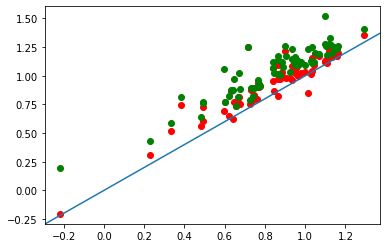

In [53]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1)
ax.scatter(means, tpreds['cqeut'], color='r')
ax.scatter(means, maxes, color='g')
#ax.scatter(means, randlist, color='b')

In [67]:
mean(utbest)

0.5750998928652782

In [32]:
lpredsall.loc[0]

Unnamed: 0                                                      0
Unnamed: 0.1                                                    0
src             Après tout, en tant que journaliste d'investig...
hyp             <s> Après tout, en tant que journaliste d'inve...
ref             After all, as a campaigning investigative jour...
ahyp             After all, as an investigative reporter in th...
scos                                                     0.334722
Name: 0, dtype: object

In [28]:
#hyps, cqe, posthoc, comet, cqeut =  generate_scores("fr-en", 0)
#with open('torchsaved/newbigreslattice.pickle', 'wb') as handle:
#    pickle.dump(newbigres, handle)

In [8]:
# ahyps, cqe, posthoc, comet, cqeut, lens
# bigres = genmany("fr-en")
# using loaded
with open('torchsaved/newbigreslattice.pickle', 'rb') as handle:
    bigres = pickle.load(handle)

In [27]:
latvals1['hyps'][-1]

' As Iran sought to extend its influence and advance its interests, as well as those of its Shi a allies, talks with the Security Council came to be closely linked to its region-wide ambition s.'

In [ ]:
#with open('bigreslattice.pickle', 'wb') as handle:
#    pickle.dump(bigres, handle)

In [12]:
cqeut[-1]

0.6277338862419128

In [70]:
len(bigres[-1])

76

In [9]:
def rerank_distr(bgres, funct):
    distr = []
    for i in range(len(bgres[-1])):
        ebi = extract_bg_ind(bgres, i)
        rerind = funct(ebi)
        tmp = {}
        for k in ebi.keys():
            if k=="ref" or k=="src":
                continue
            tmp[k] = ebi[k][rerind]
        distr.append(tmp)
    return distr

def getfull_data(bgres):
    hyps = []
    refs = []
    srcs = []
    for i in range(len(bgres[-1])):
        ebi = extract_bg_ind(bgres, i)
        hyps.extend(ebi['hyps'])
        refs.extend([ebi['ref']]*len(ebi['hyps']))
        srcs.extend([ebi['src']]*len(ebi['hyps']))
    return hyps, refs, srcs

METRIC = "comet"
def rerank_single(ebi):
    return np.argmax(ebi[METRIC])

def rerank_weighted(ebi):
    newarr = []
    for i in range(len(ebi['comet'])):
        newarr.append( 1*ebi['cqeut'][i]-1.25*ebi['posthoc'][i])
    #print(ebi['posthoc'])
    #print(mean(newarr))
    return np.argmax(newarr)

def rerank_rand(ebi):
    return random.choice(list(range(len(ebi['comet']))))

In [13]:
hy, re, sr = getfull_data(bigres)

In [ ]:
posthoc = get_scores_auto(hy, re, sr, "posthoc", "fr-en")

In [34]:
import json
import numpy as np

In [38]:
dictionary = {
    "pscores": posthoc,
}
 
# Serializing json
json_object = json.dumps(dictionary, indent=4)
 
# Writing to sample.json
with open("posthocdata.json", "w") as outfile:
    outfile.write(json_object)

In [26]:
bigres[2] = posthoc

TypeError: 'tuple' object does not support item assignment

In [27]:
newbigres = bigres[0], bigres[1], posthoc, bigres[3], bigres[4], bigres[5]

In [12]:
METRIC = "comet"
commax = [r['cqeut'] for r in rerank_distr(bigres, rerank_single)]
mean(commax)

0.8735709739358801

In [150]:
ebi = extract_bg_ind(bigres, 0)

In [151]:
ebi['src']

"Après tout, en tant que journaliste d'investigation en campagne, elle a enragé beaucoup d'autres gens outre Poutine, parmi lesquels l'actuel Premier ministre tchétchène Ramzan Kadyrov n'est pas des moindres, qu'elle a accusé de mener une politique d'enlèvements contre rançons. "

In [11]:
import numpy as np
import random

In [103]:
mean(waddpreds['comet'][:76])

0.6795314723919881